# CNN architecture

Codes were modified from [Dive into Deep Neural Networks](http://d2l.ai/chapter_convolutional-neural-networks/index.html).

To see the original, check this [link](https://github.com/probml/pyprobml). 

## Download and import torch modules

In [2]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython import display

import torch
import torchvision

from torch import nn
from torch.nn import functional as F
from torch.utils import data
from torchvision import transforms

import random
import os
import time

from utils.cnn_functions import *
# from torchviz import make_dot
import gc
import pandas as pd
import seaborn as sns

np.random.seed(seed=1)
torch.manual_seed(1)

In [3]:
# Load data
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size=batch_size)
train_iter_upscale, test_iter_upscale = load_data_fashion_mnist(batch_size=batch_size, resize=224)

# CNN custom simple

In [12]:
# Model definition
net_simple = torch.nn.Sequential(
    Reshape_28(),
    nn.Conv2d(1, 64, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(12544, 10),
)

In [13]:
# Check output shape
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
for layer in net_simple:
    X = layer(X)
    print(layer.__class__.__name__, "output shape: \t", X.shape)
    
total_params_net_simple = sum(p.numel() for p in net_simple.parameters() if p.requires_grad)
print("Total number of parameters: ", total_params_net_simple)

Reshape_28 output shape: 	 torch.Size([1, 1, 28, 28])
Conv2d output shape: 	 torch.Size([1, 64, 28, 28])
ReLU output shape: 	 torch.Size([1, 64, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 64, 14, 14])
Flatten output shape: 	 torch.Size([1, 12544])
Linear output shape: 	 torch.Size([1, 10])
Total number of parameters:  127114


loss 0.241, train acc 0.913, test acc 0.903
39133.6 examples/sec on cuda:0
Time cost:  71.9741280078888


Text(0.5, 1.0, 'Custom Simple')

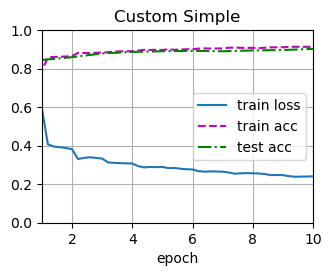

In [14]:
# Train the model and create plot
lr, num_epochs = 0.001, 10

t = time.time()
train(net_simple, train_iter, test_iter, num_epochs, lr, try_gpu())
net_simple_timer = time.time() - t
print("Time cost: ", net_simple_timer)

plt.title("Custom Simple")

In [15]:
# Evaluate the accuracy
acc_net_simple = evaluate_accuracy_gpu(net_simple, test_iter)
print(acc_net_simple)

0.9032


# CNN Lenet-5

In [16]:
# Model definition
net_lenet = torch.nn.Sequential(
    Reshape_28(),
    nn.Conv2d(1, 6, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(400, 120),
    nn.ReLU(),
    nn.Linear(120, 84),
    nn.Sigmoid(),
    nn.Linear(84, 10),
)

In [17]:
# Check output shape
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
for layer in net_lenet:
    X = layer(X)
    print(layer.__class__.__name__, "output shape: \t", X.shape)

Reshape_28 output shape: 	 torch.Size([1, 1, 28, 28])
Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
ReLU output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
ReLU output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
ReLU output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


In [18]:
# Calculate number of trainable parameters
total_params_net_lenet = sum(p.numel() for p in net_lenet.parameters() if p.requires_grad)
print(total_params_net_lenet)

61706


loss 0.326, train acc 0.880, test acc 0.871
52296.9 examples/sec on cuda:0


Text(0.5, 1.0, 'Lenet-5')

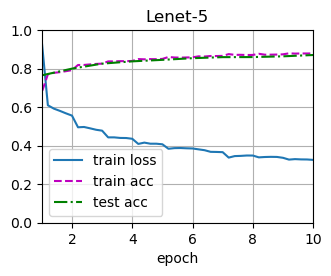

In [19]:
# Train the model and create plot
t = time.time()
lr, num_epochs = 0.001, 10
train(net_lenet, train_iter, test_iter, num_epochs, lr, try_gpu())
lenet_timer = time.time() - t

plt.title("Lenet-5")

In [20]:
print(lenet_timer)

68.40399551391602


In [21]:
# Evaluate the accuracy
acc_net_lenet = evaluate_accuracy_gpu(net_lenet, test_iter)
print(acc_net_lenet)

0.8712


# CNN AlexNet

In [22]:
# Model definition
net_alex = torch.nn.Sequential(
    Reshape_224(), 
    nn.Conv2d(1, 48, kernel_size=11, stride=4),
    nn.ReLU(),
    nn.MaxPool2d(3, 2),
    
    nn.Conv2d(48, 128, 5, 1, 2),
    nn.ReLU(),
    nn.MaxPool2d(3, 2),
    
    nn.Conv2d(128, 192, 3, 1, 1),
    nn.ReLU(),
    nn.Conv2d(192, 192, 3, 1, 1),
    nn.ReLU(),
    nn.Conv2d(192, 128, 3, 1, 1),
    nn.ReLU(),
    nn.MaxPool2d(3, 2),
    
    nn.Flatten(),
    
    nn.Linear(3200, 2048), 
    nn.ReLU(),
    nn.Dropout(0.5), 
    
    nn.Linear(2048, 2048), 
    nn.ReLU(), 
    nn.Dropout(0.5),
    nn.Linear(2048, 10)
)

In [23]:
# Check output shape
X = torch.rand(size=(1, 1, 224, 224))
for layer in net_alex:
    X = layer(X)
    print(layer.__class__.__name__, "output shape:\t", X.shape)

Reshape_224 output shape:	 torch.Size([1, 1, 224, 224])
Conv2d output shape:	 torch.Size([1, 48, 54, 54])
ReLU output shape:	 torch.Size([1, 48, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 48, 26, 26])
Conv2d output shape:	 torch.Size([1, 128, 26, 26])
ReLU output shape:	 torch.Size([1, 128, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 128, 12, 12])
Conv2d output shape:	 torch.Size([1, 192, 12, 12])
ReLU output shape:	 torch.Size([1, 192, 12, 12])
Conv2d output shape:	 torch.Size([1, 192, 12, 12])
ReLU output shape:	 torch.Size([1, 192, 12, 12])
Conv2d output shape:	 torch.Size([1, 128, 12, 12])
ReLU output shape:	 torch.Size([1, 128, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 128, 5, 5])
Flatten output shape:	 torch.Size([1, 3200])
Linear output shape:	 torch.Size([1, 2048])
ReLU output shape:	 torch.Size([1, 2048])
Dropout output shape:	 torch.Size([1, 2048])
Linear output shape:	 torch.Size([1, 2048])
ReLU output shape:	 torch.Size([1, 2048])
Dropout output shape:	 to

In [24]:
# Calculate number of trainable parameters
total_params_alex = sum(p.numel() for p in net_alex.parameters() if p.requires_grad)
print(total_params_alex)

11706730


loss 0.139, train acc 0.948, test acc 0.916
1646.2 examples/sec on cuda:0
Time cost:  468.3784101009369


Text(0.5, 1.0, 'AlexNet')

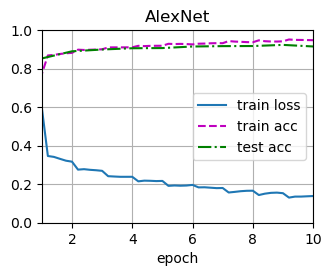

In [25]:
# Train the model and create plot
lr, num_epochs = 0.001, 10

t = time.time()
train(net_alex, train_iter_upscale, test_iter_upscale, num_epochs, lr, try_gpu())
net_alex_timer = time.time() - t
print("Time cost: ", net_alex_timer)

plt.title("AlexNet")

In [26]:
# Evaluate the accuracy
acc_alex = evaluate_accuracy_gpu(net_alex, test_iter_upscale)
print(acc_alex)

0.9156


# CNN ResNet

In [27]:
# Model definition
b1 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
)

b2 = nn.Sequential(*resnet_block(64, 64, 2, first_block=True))
b3 = nn.Sequential(*resnet_block(64, 128, 2))
b4 = nn.Sequential(*resnet_block(128, 256, 2))
b5 = nn.Sequential(*resnet_block(256, 512, 2))

res_net = nn.Sequential(Reshape_224(), 
                        b1, b2, b3, b4, b5, 
                        nn.AdaptiveAvgPool2d((1, 1)), 
                        nn.Flatten(), 
                        nn.Linear(512, 10))

In [28]:
# Check output shape
X = torch.rand(size=(1, 1, 224, 224))
for layer in res_net:
    X = layer(X)
    print(layer.__class__.__name__, "output shape:\t", X.shape)

Reshape_224 output shape:	 torch.Size([1, 1, 224, 224])
Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 128, 28, 28])
Sequential output shape:	 torch.Size([1, 256, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 512, 1, 1])
Flatten output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 10])


In [29]:
# Calculate number of trainable parameters
total_params_res = sum(p.numel() for p in res_net.parameters() if p.requires_grad)
print(total_params_res)

11178378


loss 0.058, train acc 0.980, test acc 0.928
177.4 examples/sec on cuda:0
Time cost:  3622.1534838676453


Text(0.5, 1.0, 'ResNet')

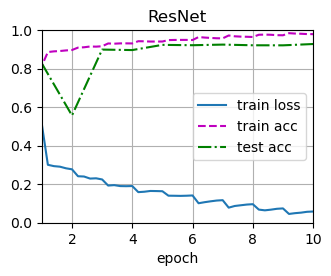

In [30]:
# Train the model and create plot
lr, num_epochs = 0.001, 10

t = time.time()
train(res_net, train_iter_upscale, test_iter_upscale, num_epochs, lr, try_gpu())
net_res_timer = time.time() - t
print("Time cost: ", net_res_timer)

plt.title("ResNet")

In [31]:
# Evaluate the accuracy
acc_res = evaluate_accuracy_gpu(res_net, test_iter_upscale)
print(acc_res)

0.9283


# VGG-11

In [32]:
# Model definition
net_vgg = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(64, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(128, 128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(128, 128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(128, 128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    nn.Flatten(),

    nn.Linear(6272, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    
    nn.Linear(1024, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    
    nn.Linear(1024, 10)
    )


In [33]:
# Check output shape
X = torch.rand(size=(1, 1, 224, 224))
for layer in net_vgg:
    X = layer(X)
    print(layer.__class__.__name__, "output shape:\t", X.shape)

Conv2d output shape:	 torch.Size([1, 16, 224, 224])
ReLU output shape:	 torch.Size([1, 16, 224, 224])
MaxPool2d output shape:	 torch.Size([1, 16, 112, 112])
Conv2d output shape:	 torch.Size([1, 32, 112, 112])
ReLU output shape:	 torch.Size([1, 32, 112, 112])
MaxPool2d output shape:	 torch.Size([1, 32, 56, 56])
Conv2d output shape:	 torch.Size([1, 64, 56, 56])
ReLU output shape:	 torch.Size([1, 64, 56, 56])
Conv2d output shape:	 torch.Size([1, 64, 56, 56])
ReLU output shape:	 torch.Size([1, 64, 56, 56])
MaxPool2d output shape:	 torch.Size([1, 64, 28, 28])
Conv2d output shape:	 torch.Size([1, 128, 28, 28])
ReLU output shape:	 torch.Size([1, 128, 28, 28])
Conv2d output shape:	 torch.Size([1, 128, 28, 28])
ReLU output shape:	 torch.Size([1, 128, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 128, 14, 14])
Conv2d output shape:	 torch.Size([1, 128, 14, 14])
ReLU output shape:	 torch.Size([1, 128, 14, 14])
Conv2d output shape:	 torch.Size([1, 128, 14, 14])
ReLU output shape:	 torch.Size([1,

In [34]:
# Calculate number of trainable parameters
total_params_vgg = sum(p.numel() for p in net_vgg.parameters() if p.requires_grad)
print(total_params_vgg)

8060234


In [73]:
gc.collect()
torch.cuda.empty_cache()

loss 0.100, train acc 0.964, test acc 0.932
321.3 examples/sec on cuda:0
Time cost:  2029.543307542801


Text(0.5, 1.0, 'VGG-11')

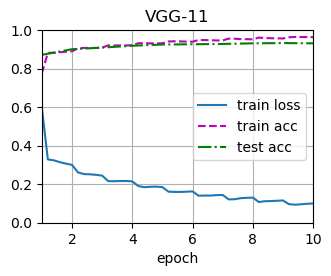

In [36]:
# Train the model and create plot
lr, num_epochs = 0.001, 10

t = time.time()
train(net_vgg, train_iter_upscale, test_iter_upscale, num_epochs, lr, try_gpu())
net_vgg_timer = time.time() - t

print("Time cost: ", net_vgg_timer)

plt.title("VGG-11")

In [37]:
# Evaluate the accuracy
acc_vgg = evaluate_accuracy_gpu(net_vgg, test_iter_upscale)
print(acc_vgg)

0.9319


# Inception-v1

In [6]:
# Model definition
net_inc = nn.Sequential(
    Reshape_224(),
    nn.Conv2d(1, 32, 7, stride=2, padding=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2, padding=1),
    nn.Conv2d(in_channels=32,out_channels=32,kernel_size=1),
    nn.Conv2d(in_channels=32,out_channels=96,kernel_size=3,padding=1),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
    Inception(96,32,(48,64),(8,16),16),
    Inception(128,64,(64,96),(16,48),32),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
    Inception(240, 96, (48, 104), (8, 24), 32),
    Inception(256, 80, (56, 112), (12, 32), 32),
    Inception(256, 64, (64, 128), (12, 32), 32),
    Inception(256, 56, (72, 144), (16, 32), 32),
    Inception(264, 128, (80, 160), (16, 64), 64),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
    Inception(416, 128, (80, 160), (16, 64), 64),
    Inception(416, 192, (96, 192), (24, 64), 64),
    nn.AvgPool2d(kernel_size=7),
    nn.Dropout(0.4),
    nn.Flatten(),
    nn.Linear(512, 10)
             )

In [7]:
# Check output shape
X = torch.rand(size=(1, 1, 224, 224))
for layer in net_inc:
    X = layer(X)
    print(layer.__class__.__name__, "output shape:\t", X.shape)

Reshape_224 output shape:	 torch.Size([1, 1, 224, 224])
Conv2d output shape:	 torch.Size([1, 32, 112, 112])
ReLU output shape:	 torch.Size([1, 32, 112, 112])
MaxPool2d output shape:	 torch.Size([1, 32, 56, 56])
Conv2d output shape:	 torch.Size([1, 32, 56, 56])
Conv2d output shape:	 torch.Size([1, 96, 56, 56])
MaxPool2d output shape:	 torch.Size([1, 96, 28, 28])
Inception output shape:	 torch.Size([1, 128, 28, 28])
Inception output shape:	 torch.Size([1, 240, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 240, 14, 14])
Inception output shape:	 torch.Size([1, 256, 14, 14])
Inception output shape:	 torch.Size([1, 256, 14, 14])
Inception output shape:	 torch.Size([1, 256, 14, 14])
Inception output shape:	 torch.Size([1, 264, 14, 14])
Inception output shape:	 torch.Size([1, 416, 14, 14])
MaxPool2d output shape:	 torch.Size([1, 416, 7, 7])
Inception output shape:	 torch.Size([1, 416, 7, 7])
Inception output shape:	 torch.Size([1, 512, 7, 7])
AvgPool2d output shape:	 torch.Size([1, 512, 1, 

In [8]:
# Calculate number of trainable parameters
total_params_inc = sum(p.numel() for p in net_inc.parameters() if p.requires_grad)
print(total_params_inc)

1519650


loss 0.114, train acc 0.958, test acc 0.918
339.2 examples/sec on cuda:0
Time cost:  1926.6895956993103


Text(0.5, 1.0, 'Inception-v1')

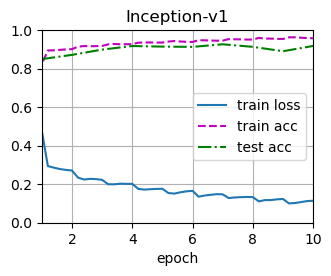

In [9]:
# Train the model and create plot
lr, num_epochs = 0.001, 10

t = time.time()
train(net_inc, train_iter_upscale, test_iter_upscale, num_epochs, lr, try_gpu())
net_inc_timer = time.time() - t

print("Time cost: ", net_inc_timer)

plt.title("Inception-v1")

In [10]:
# Evaluate the accuracy
acc_inc = evaluate_accuracy_gpu(net_inc, test_iter_upscale)
print(acc_inc)

0.9183


# Model Comparison

In [67]:
# Make prediction and measure the time
test_fit_time_simple, y_hat_simple, y_test = predict_gpu(net_simple, test_iter, device=try_gpu())
test_fit_time_lenet, y_hat_lenet, _ = predict_gpu(net_lenet, test_iter, device=try_gpu())
test_fit_time_alex, y_hat_alex, _ = predict_gpu(net_alex, test_iter_upscale, device=try_gpu())
test_fit_time_res, y_hat_res, _ = predict_gpu(res_net, test_iter_upscale, device=try_gpu())
test_fit_time_vgg, y_hat_vgg, _ = predict_gpu(net_vgg, test_iter_upscale, device=try_gpu())
test_fit_time_inc, y_hat_inc, _ = predict_gpu(net_inc, test_iter_upscale, device=try_gpu())

In [68]:
# Put model statistics together
cnn_stats = pd.DataFrame({"model": ["lenet-5", "custom_simple", "alex_net","inception-v1", "res-net", "vgg-11", ],
            "accuracy": [acc_net_lenet, acc_net_simple, acc_alex, acc_inc, acc_res, acc_vgg, ],
            "model_size": [total_params_net_lenet, total_params_net_simple, 
                           total_params_alex, total_params_inc, total_params_res,
                          total_params_vgg, ],
            "model_fitting_time": [lenet_timer, net_simple_timer, net_alex_timer,
                                   net_inc_timer, net_res_timer, net_vgg_timer, ],
            "model_testing_time": [test_fit_time_lenet, test_fit_time_simple, test_fit_time_alex,
                                   test_fit_time_inc, test_fit_time_res, test_fit_time_vgg]})

In [69]:
cnn_stats

,model,accuracy,model_size,model_fitting_time,model_testing_time
0,lenet-5,0.8712,61706,68.403996,0.076461
1,custom_simple,0.9032,127114,71.974128,0.366965
2,alex_net,0.9156,11706730,468.378410,2.259583
3,inception-v1,0.9183,1519650,1926.689596,6.907242
4,res-net,0.9283,11178378,3622.153484,7.749459
5,vgg-11,0.9319,8060234,2029.543308,4.128778


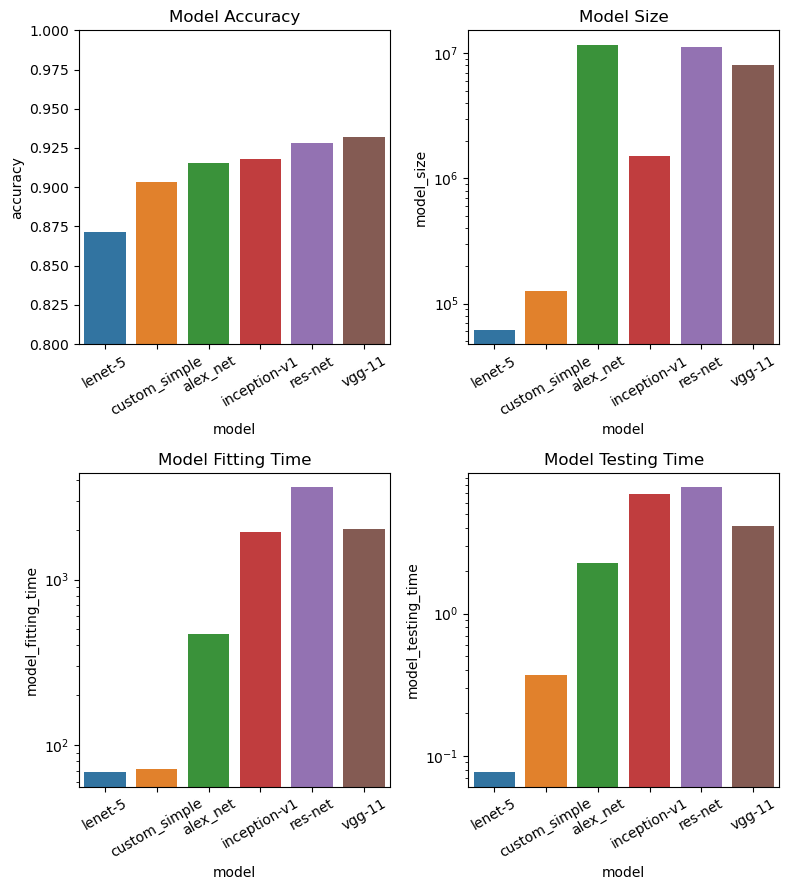

In [111]:
# Summarize the models
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,9))

sns.barplot(data=cnn_stats, x="model", y="accuracy", ax=axes[0][0])
axes[0][0].set_xticklabels(cnn_stats.model, rotation = 30)
axes[0][0].set_title("Model Accuracy")
axes[0][0].set_ylim(0.8, 1)

sns.barplot(data=cnn_stats, x="model", y="model_size", ax=axes[0][1])
axes[0][1].set_xticklabels(cnn_stats.model, rotation = 30)
axes[0][1].set_title("Model Size")
axes[0][1].set_yscale("log")

sns.barplot(data=cnn_stats, x="model", y="model_fitting_time", ax=axes[1][0])
axes[1][0].set_xticklabels(cnn_stats.model, rotation = 30)
axes[1][0].set_title("Model Fitting Time")
axes[1][0].set_yscale("log")

sns.barplot(data=cnn_stats, x="model", y="model_testing_time", ax=axes[1][1])
axes[1][1].set_xticklabels(cnn_stats.model, rotation = 30)
axes[1][1].set_title("Model Testing Time")
axes[1][1].set_yscale("log")

plt.tight_layout()  
plt.show()

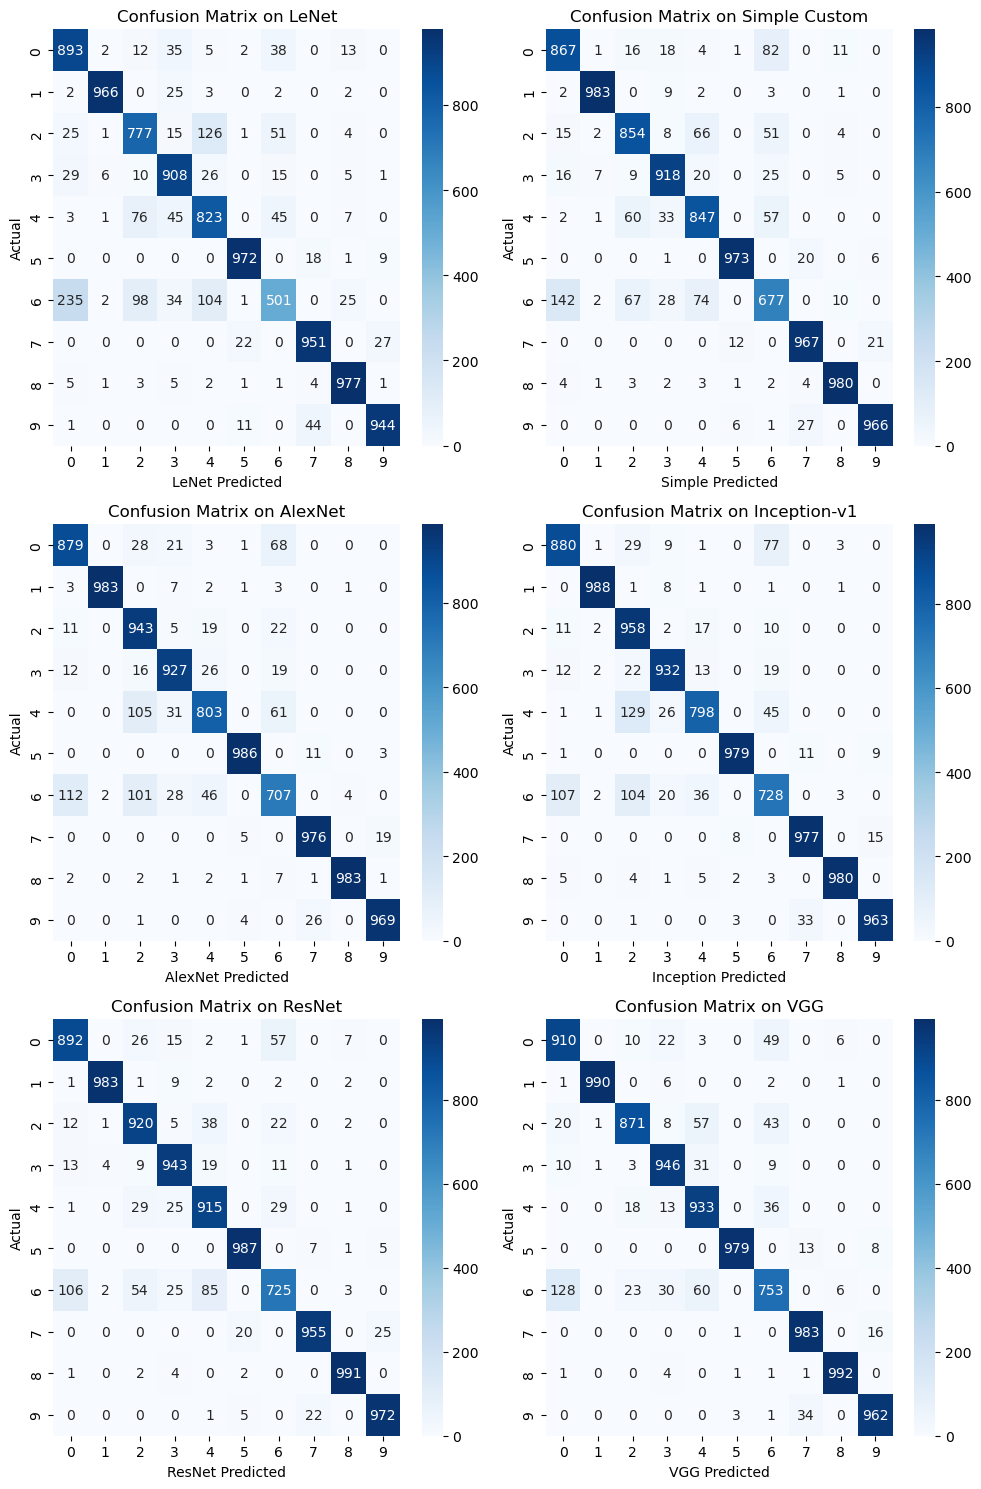

In [112]:
# Confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))

axes[0][0].set_title("Confusion Matrix on LeNet")
sns.heatmap(pd.crosstab(pd.Series(y_test, name='Actual' ),
                        pd.Series(y_hat_lenet, name='LeNet Predicted')),
            cmap="Blues", annot=True, fmt='g', ax=axes[0][0])

axes[0][1].set_title("Confusion Matrix on Simple Custom")
sns.heatmap(pd.crosstab(pd.Series(y_test, name='Actual' ),
                        pd.Series(y_hat_simple, name='Simple Predicted')),
            cmap="Blues", annot=True, fmt='g', ax=axes[0][1])

axes[1][0].set_title("Confusion Matrix on AlexNet")
sns.heatmap(pd.crosstab(pd.Series(y_test, name='Actual' ),
                        pd.Series(y_hat_alex, name='AlexNet Predicted')),
            cmap="Blues", annot=True, fmt='g', ax=axes[1][0])

axes[1][1].set_title("Confusion Matrix on Inception-v1")
sns.heatmap(pd.crosstab(pd.Series(y_test, name='Actual' ),
                        pd.Series(y_hat_inc, name='Inception Predicted')),
            cmap="Blues", annot=True, fmt='g', ax=axes[1][1])

axes[2][0].set_title("Confusion Matrix on ResNet")
sns.heatmap(pd.crosstab(pd.Series(y_test, name='Actual' ),
                        pd.Series(y_hat_res, name='ResNet Predicted')),
            cmap="Blues", annot=True, fmt='g', ax=axes[2][0])

axes[2][1].set_title("Confusion Matrix on VGG")
sns.heatmap(pd.crosstab(pd.Series(y_test, name='Actual' ),
                        pd.Series(y_hat_vgg, name='VGG Predicted')),
            cmap="Blues", annot=True, fmt='g', ax=axes[2][1])

plt.tight_layout()  
plt.show()

We built six types of CNN models, i.e, custom simple CNN (one convolution layer plus one linear layer), LeNet CNN (two convolution layers and three linear layers), AlexNet CNN (five convolution layers and two linear layer), ResNet CNN (one convolution layer, four Residual Convolution Block and one linear layer), VFF-11 CNN (eight convolution layers and three linear layers), and Inception-v1 (i.e., GoogleNet) CNN (three convolution layers, nine inception convolution blocks, and one linear layer). 

The result of the model comparison suggests that:

1. the residual CNN performans the best for multi-class classification task (0.9165), three layer CNN is at the second position (0.9113), followed by two layer CNN (0.9058) and one layer CNN (0.9037).

2. While there is small difference among accuracy of different CNN models, their model sizes are very different. The residual CNN has the highest model size (N parameter is 677258). The three layer (598582). The two layer (159626). The one layer (127114).

3. There is a positive relationship between model size and model accuracy: the larger model the better model accuracy. 